In [1]:
#imports from scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import model_selection   
from sklearn import metrics

%pip install keras

#imports from keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
%pip install scikeras

from scikeras.wrappers import KerasRegressor

#imports of time series models
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#utils
import numpy as np
import pandas as pd
%pip install pandas_datareader
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
dataset = pd.read_excel('SCFP2009panel.xlsx')


In [3]:
dataset.shape

(19285, 515)

In [4]:
# -------- BLOCK 3: Exploratory Data Analysis (EDA) --------
print(dataset.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19285 entries, 0 to 19284
Columns: 515 entries, YY1 to I
dtypes: float64(212), int64(303)
memory usage: 75.8 MB
None


In [5]:
print(dataset.describe())

                YY1            Y1         WGT09         AGE07       AGECL07  \
count  19285.000000  19285.000000  19285.000000  19285.000000  19285.000000   
mean    2222.613689  22229.136894   5868.854779     51.647654      3.228157   
std     1275.293152  12752.931600   3881.525292     15.662512      1.494929   
min        1.000000     11.000000      0.885319     19.000000      1.000000   
25%     1130.000000  11302.000000   1992.217143     40.000000      2.000000   
50%     2233.000000  22333.000000   6756.245225     51.000000      3.000000   
75%     3323.000000  33234.000000   8538.990444     62.000000      4.000000   
max     4423.000000  44235.000000  17895.936632     95.000000      6.000000   

             EDUC07        EDCL07     MARRIED07        KIDS07      LIFECL07  \
count  19285.000000  19285.000000  19285.000000  19285.000000  19285.000000   
mean      14.072855      3.055535      1.314752      0.876588      3.792585   
std        2.733539      1.055146      0.464429    

In [6]:
# Compute the risky assets and risk-free assets
dataset['RiskFree07']= dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07']
dataset['RiskFree09'] = dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09']

In [7]:
# Compute the risk tolerance for 2007
dataset['RT07'] = dataset['Risky07']/ (dataset['Risky07']+dataset['RiskFree07'])
#Average stock index for normalizing the risky assets in 2009
Average_SP500_2007=1478
Average_SP500_2009=948
# Compute the risk tolerance for 2009
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])*(Average_SP500_2009/Average_SP500_2007)

In [8]:
dataset.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,RiskFree07,Risky07,RiskFree09,Risky09,RT07,RT09
0,1,11,11668.134198,47,3,12,2,1,0,2,...,0.0,93.125197,270.403054,57,7994.813847,0.0,16000,17000,0.0,0.330422
1,1,12,11823.456494,47,3,12,2,1,0,2,...,0.0,93.125197,249.593620,57,7994.813847,0.0,19000,18000,0.0,0.312036
2,1,13,11913.228354,47,3,12,2,1,0,2,...,0.0,93.125197,209.233358,57,7984.457871,0.0,13000,12000,0.0,0.307876
3,1,14,11929.394266,47,3,12,2,1,0,2,...,0.0,93.125197,209.273158,57,7984.457871,0.0,25000,13000,0.0,0.219429
4,1,15,11917.722907,47,3,12,2,1,0,2,...,0.0,93.125197,232.690767,57,7994.813847,0.0,17000,12000,0.0,0.265410


In [9]:
#percentage of change
dataset['PercentageChange'] = np.abs(dataset['RT09']/dataset['RT07'] - 1)


In [10]:
# Drop the rows containing NA
dataset=dataset.dropna(axis=0)


In [11]:
mask = dataset.isnull().any(axis=1) | dataset.isin([np.inf, -np.inf]).any(axis=1)
dataset = dataset[~mask]

C:\Users\Sayan\AppData\Local\Temp\ipykernel_2508\2313023117.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['RT07'], hist=True, kde=False, bins=int(36), color = 'blue', hist_kws={'edgecolor':'black'})


<Axes: xlabel='RT07'>

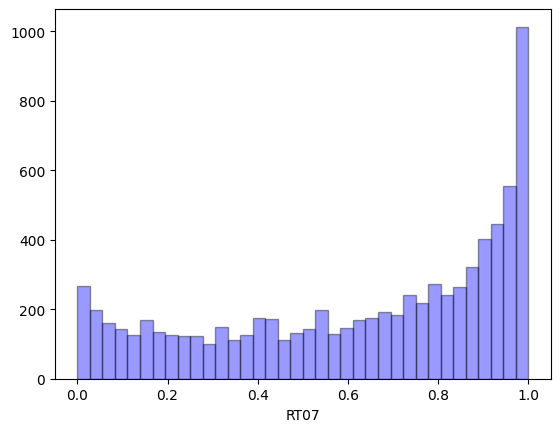

In [12]:
#risk 2007
sns.distplot(dataset['RT07'], hist=True, kde=False, bins=int(36), color = 'blue', hist_kws={'edgecolor':'black'})

C:\Users\Sayan\AppData\Local\Temp\ipykernel_2508\2453729835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['RT09'], hist=True, kde=False, bins=int(36), color = 'blue', hist_kws={'edgecolor':'black'})


<Axes: xlabel='RT09'>

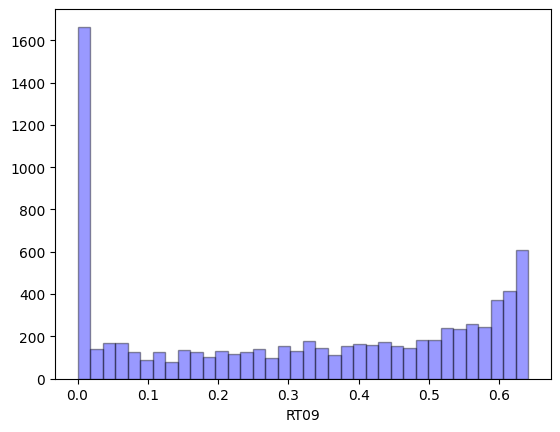

In [13]:
#risk 2009
sns.distplot(dataset['RT09'], hist=True, kde=False, bins=int(36), color = 'blue', hist_kws={'edgecolor':'black'})

In [14]:
dataset3 = dataset[dataset['PercentageChange']<=.1]

In [15]:
#the TrueRiskTolerance will be the predicted variable for this study
dataset3 = dataset3.assign(TrueRiskTolerance = lambda x: (x['RT07'] + x['RT09'])/2)

In [16]:
#removing unnecessary variables
dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

## Lets check only the most impactful variables: Demographic attributes, financial attributes and behavioral attributes
### (age, marital status, education, num. kids, occupation, financial balance, net worth, income, willingness to take risk)

In [17]:
keep_list2 = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance']
drop_list2 = [col for col in dataset3.columns if col not in keep_list2]
dataset3.drop(labels=drop_list2, axis=1, inplace=True)

<Axes: title={'center': 'Correlation Matrix'}>

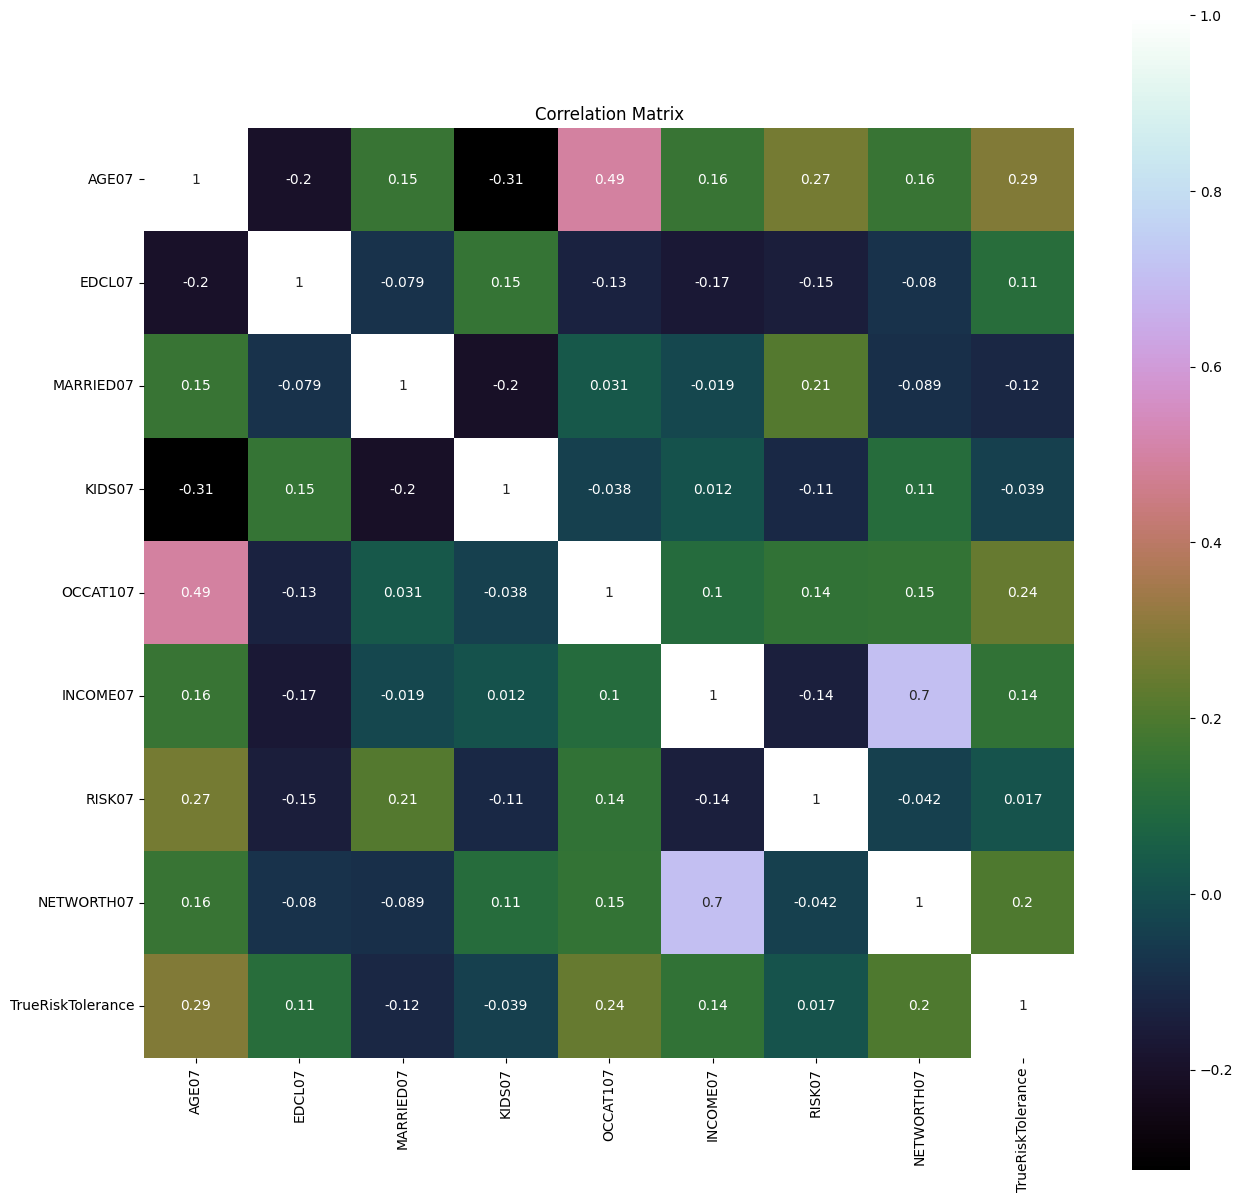

In [18]:
# correlation
correlation = dataset3.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [19]:
Y= dataset3["TrueRiskTolerance"]
X = dataset3.loc[:, dataset3.columns != 'TrueRiskTolerance']
validation_size = 0.2
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=42)

In [20]:
num_folds = 10
scoring = 'r2'
# spot-check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Ensemble Models
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [22]:
from sklearn.model_selection import cross_val_score, KFold


#models evaluation 
results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=3)
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: R2 = {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")


LR: R2 = -0.0784 (+/- 0.5811)
LASSO: R2 = -0.2820 (+/- 0.8503)
EN: R2 = -0.2387 (+/- 0.8301)
KNN: R2 = 0.4408 (+/- 0.2009)
CART: R2 = 0.5432 (+/- 0.2863)
SVR: R2 = 0.1323 (+/- 0.1319)
ABR: R2 = 0.4339 (+/- 0.1357)
GBR: R2 = 0.6867 (+/- 0.1192)
RFR: R2 = 0.7060 (+/- 0.1608)
ETR: R2 = 0.7399 (+/- 0.1533)


In [24]:
import matplotlib.pyplot as plt

C:\Users\Sayan\AppData\Local\Temp\ipykernel_2508\3534642617.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


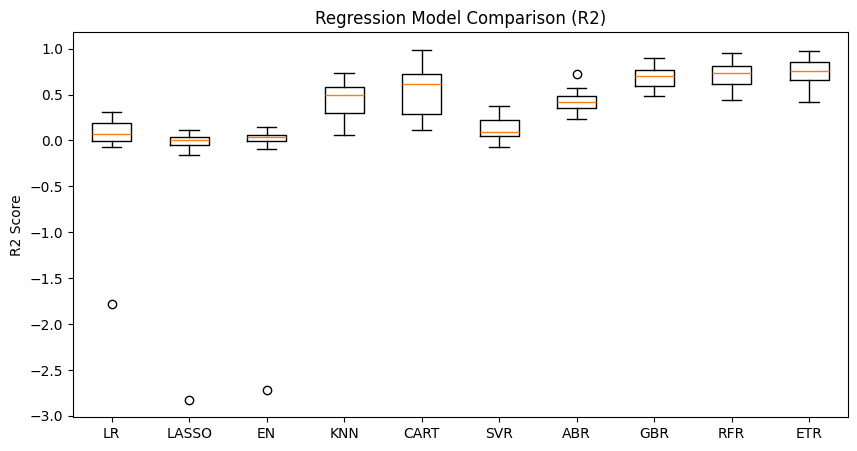

In [25]:
# Boxplot of model performance
plt.figure(figsize=(10,5))
plt.boxplot(results, labels=names)
plt.title("Regression Model Comparison (R2)")
plt.ylabel("R2 Score")
plt.show()

In [26]:
# 8. Grid search : RandomForestRegressor
'''
n_estimators : integer, optional (default=10)
 The number of trees in the forest.
'''
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = model_selection.KFold(n_splits=num_folds)
grid = model_selection.GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.703411 using {'n_estimators': 300}


In [28]:
from sklearn.model_selection import GridSearchCV
# -------- BLOCK 6: Hyperparameter Tuning (Random Forest) --------
param_grid = {'n_estimators': [50,100,150,200,250,300]}
grid = GridSearchCV(RandomForestRegressor(random_state=3), param_grid, cv=kfold, scoring='r2')
grid.fit(X_train, Y_train)
print(f"Best RF: R2={grid.best_score_:.4f} with params={grid.best_params_}")

Best RF: R2=0.7165 with params={'n_estimators': 100}


In [31]:
from sklearn.metrics import r2_score, mean_squared_error
# -------- BLOCK 7: Final Model Training & Evaluation --------
best_rf = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'], random_state=3)
best_rf.fit(X_train, Y_train)
y_pred = best_rf.predict(X_validation)
print("Test R2:", r2_score(Y_validation, y_pred))
print("Test MSE:", mean_squared_error(Y_validation, y_pred))
print("Test MSE:", (mean_squared_error(Y_validation, y_pred)))

Test R2: 0.6148997637085569
Test MSE: 0.011880977626325406
Test MSE: 0.011880977626325406


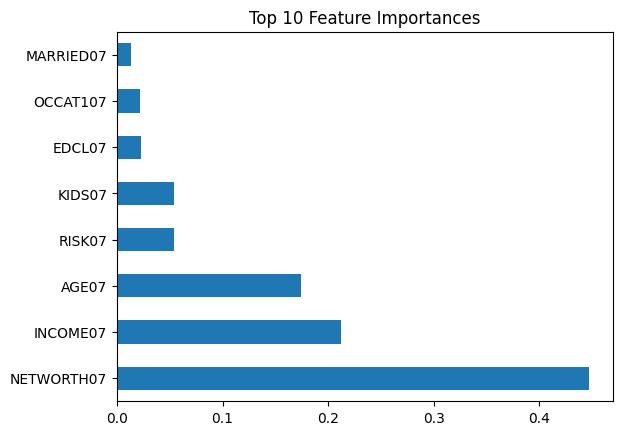

In [32]:
# -------- BLOCK 8: Feature Importance --------
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
plt.figure()
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [34]:
import pickle
# Save the model to disk
with open("finalized_model.sav", "wb") as f:
    pickle.dump(best_rf, f)